# Projeto: Prevendo o futuro da Renner: Projetando novas lojas e a Receita com Python

* Vamos usar programação para projetar novas aberturas de lojas e, consequentemente, o crescimento de receita da empresa.
* Nós vamos ser conservadores na projeção e isso vai ajudar muito nas premissas!

### Passo a passo:

   **Passo 1** - Importar bibliotecas
   
   **Passo 2** - Pegar e tratar dados de Lojas atuais da Renner
   
   **Passo 3** - Pegar dados de PIB e população de municípios no Brasil 
   
   **Passo 4** - Juntar dados de municípios as lojas da Renner
   
   **Passo 5** - Análise exploratória dos dados
   
   **Passo 6** - Pegar dados de quantos shoppings centers grandes existem em cada cidade do país.
   
   **Passo 7** - Calcular quantas lojas em Shopping a Renner tem aberta em cada cidade do Brasil
   
   **Passo 8** - Cruzar lojas atuais X Total de Shoppings

   **Passo 9** - Calculando a abertura de lojas em Shoppings

   **Passo 10** - Calculando a abertura de lojas de rua

   **Passo 11** - Usar o modelo de Valuation da VAROS pra projetar a receita dos próximos anos + perpetuidade

<br>  
   
-------------------

# Passo 1 - Importar as bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import mplcyberpunk

plt.style.use('cyberpunk')

# Passo 2 - Pegar e tratar dados de Lojas atuais da Renner

In [ ]:
aba_planilha = 'Lista de Lojas | Stores List'

planilha_renner = pd.read_excel("lojas_renner.xlsx", sheet_name = aba_planilha, skiprows = 5, 
                                usecols = ['Business', 'Country', 'UF', 'State', 'City',
                                           'Opening date', 'Shopping Mall / Street'])

In [ ]:
planilha_renner = planilha_renner.dropna()

planilha_renner = planilha_renner[(planilha_renner['Business'] == "Renner") & 
                                  (planilha_renner['Country'] == "Brazil")]

planilha_renner['Opening date'] = pd.to_datetime(planilha_renner['Opening date']).dt.date
planilha_renner

,Business,Opening date,Country,UF,State,City,Shopping Mall / Street
0,Renner,2024-09-19,Brazil,RS,Rio Grande do Sul,Santana do Livramento,Street
1,Renner,2024-08-22,Brazil,SP,São Paulo,Campos do Jordão,Street
3,Renner,2024-08-02,Brazil,GO,Goiás,Luziânia,Shopping Mall
8,Renner,2024-04-30,Brazil,SC,Santa Catarina,Araranguá,Shopping Mall
9,Renner,2024-04-30,Brazil,RJ,Rio de Janeiro,Rio das Ostras,Shopping Mall
...,...,...,...,...,...,...,...
747,Renner,1980-09-01,Brazil,RS,Rio Grande do Sul,Santa Maria,Street
748,Renner,1977-11-01,Brazil,RS,Rio Grande do Sul,Porto Alegre,Street
749,Renner,1976-04-10,Brazil,RS,Rio Grande do Sul,Canoas,Shopping Mall
750,Renner,1970-12-04,Brazil,RS,Rio Grande do Sul,Porto Alegre,Shopping Mall


# Passo 3 - Pegar dados de PIB e população de municípios no Brasil 

* Dados extraídos do IBGE
* Vamos calcular o perfil de loja atual. Qual perfil de cidade a Renner abre loja?

In [4]:
pib_municipios = pd.read_excel("pib_municipios.xlsx")
pop_municipios = pd.read_excel("populacao_municipios.xlsx")

In [5]:
dados_municipios = pib_municipios.merge(pop_municipios, on = 'City')

In [6]:
dados_municipios['pib_per_capta'] = dados_municipios['pib']/dados_municipios['pop']

In [7]:
dados_municipios[['City', 'UF']] = dados_municipios['City'].str.split("(", expand = True)

In [8]:
dados_municipios['UF'] = dados_municipios['UF'].str.replace(")", "")

dados_municipios

,City,pib,pop,pib_per_capta,UF
0,Alta Floresta D'Oeste,734469,21494,34.170885,RO
1,Ariquemes,3209761,96833,33.147388,RO
2,Cabixi,238412,5351,44.554663,RO
3,Cacoal,2792383,86887,32.138099,RO
4,Cerejeiras,743037,15890,46.761296,RO
...,...,...,...,...,...
5565,Vianópolis,857968,14956,57.366141,GO
5566,Vicentinópolis,480173,8768,54.764256,GO
5567,Vila Boa,179899,4215,42.680664,GO
5568,Vila Propício,308013,5815,52.968702,GO


# Passo 4 - Juntar dados de municípios as lojas da Renner

In [9]:
planilha_renner['City'] = planilha_renner['City'].str.strip()
planilha_renner['UF'] = planilha_renner['UF'].str.strip()
dados_municipios['City'] = dados_municipios['City'].str.strip()
dados_municipios['UF'] = dados_municipios['UF'].str.strip()

In [ ]:
dados_lojas_e_economia = dados_municipios.merge(planilha_renner, on = ['City', 'UF'])

dados_lojas_e_economia

,City,pib,pop,pib_per_capta,UF,Business,Opening date,Country,State,Shopping Mall / Street
0,Cacoal,2792383,86887,32.138099,RO,Renner,2021-04-05,Brazil,Rondônia,Shopping Mall
1,Porto Velho,20059522,460434,43.566552,RO,Renner,2008-10-30,Brazil,Rondônia,Shopping Mall
2,Rio Branco,10955675,364756,30.035627,AC,Renner,2011-11-08,Brazil,Acre,Shopping Mall
3,Manaus,103281436,2063689,50.046996,AM,Renner,2014-12-11,Brazil,Amazonas,Street
4,Manaus,103281436,2063689,50.046996,AM,Renner,2014-11-28,Brazil,Amazonas,Shopping Mall
...,...,...,...,...,...,...,...,...,...,...
427,Brasília,286943782,2817381,101.847703,DF,Renner,2009-06-25,Brazil,Distrito Federal,Shopping Mall
428,Brasília,286943782,2817381,101.847703,DF,Renner,2007-10-23,Brazil,Distrito Federal,Shopping Mall
429,Brasília,286943782,2817381,101.847703,DF,Renner,2001-05-08,Brazil,Distrito Federal,Shopping Mall
430,Brasília,286943782,2817381,101.847703,DF,Renner,2000-11-16,Brazil,Distrito Federal,Shopping Mall


# Passo 5 - Análise exploratória dos dados

# Dados sobre as lojas

### % em shoppings

In [ ]:
quantidade_por_tipo = dados_lojas_e_economia.groupby('Shopping Mall / Street')['Shopping Mall / Street'].size()/len(dados_lojas_e_economia)

Shopping Mall / Street
Shopping Mall    0.875
Street           0.125
Name: Shopping Mall / Street, dtype: float64

## A Renner abre lojas em cidades com qual perfil de renda e população?

### Menor e maior cidade com uma Renner

In [ ]:
dados_lojas_e_economia.sort_values('pop')

,City,pib,pop,pib_per_capta,UF,Business,Opening date,Country,State,Shopping Mall / Street
357,Garibaldi,2997963,34335,87.315072,RS,Renner,2021-04-15,Brazil,Rio Grande do Sul,Shopping Mall
358,Gramado,2658018,40134,66.228584,RS,Renner,2017-09-20,Brazil,Rio Grande do Sul,Street
393,Torres,1382097,41751,33.103327,RS,Renner,2021-10-23,Brazil,Rio Grande do Sul,Shopping Mall
189,Campos do Jordão,1449808,46974,30.864052,SP,Renner,2024-08-22,Brazil,São Paulo,Street
344,Canela,1595255,48946,32.592142,RS,Renner,2023-08-03,Brazil,Rio Grande do Sul,Street
...,...,...,...,...,...,...,...,...,...,...
259,São Paulo,828980608,11451999,72.387415,SP,Renner,2016-10-11,Brazil,São Paulo,Shopping Mall
260,São Paulo,828980608,11451999,72.387415,SP,Renner,2016-04-28,Brazil,São Paulo,Shopping Mall
261,São Paulo,828980608,11451999,72.387415,SP,Renner,2015-11-11,Brazil,São Paulo,Street
263,São Paulo,828980608,11451999,72.387415,SP,Renner,2013-04-18,Brazil,São Paulo,Shopping Mall


### Cidade mais rica e mais pobre com uma Renner

In [ ]:
dados_lojas_e_economia.sort_values('pib_per_capta')

,City,pib,pop,pib_per_capta,UF,Business,Opening date,Country,State,Shopping Mall / Street
421,Valparaíso de Goiás,2964512,198861,14.907458,GO,Renner,2015-11-27,Brazil,Goiás,Shopping Mall
52,Camaragibe,2229680,147771,15.088752,PE,Renner,2018-05-02,Brazil,Pernambuco,Shopping Mall
56,Paulista,5591652,342167,16.341880,PE,Renner,2016-04-26,Brazil,Pernambuco,Shopping Mall
55,Olinda,5788250,349976,16.538991,PE,Renner,2018-05-08,Brazil,Pernambuco,Shopping Mall
191,Carapicuíba,6854706,386984,17.713151,SP,Renner,2016-10-27,Brazil,São Paulo,Shopping Mall
...,...,...,...,...,...,...,...,...,...,...
176,Barueri,58027667,316473,183.357402,SP,Renner,2011-11-30,Brazil,São Paulo,Shopping Mall
177,Barueri,58027667,316473,183.357402,SP,Renner,2011-04-28,Brazil,São Paulo,Shopping Mall
18,Parauapebas,49763040,267836,185.796682,PA,Renner,2017-03-23,Brazil,Pará,Shopping Mall
182,Cajamar,22713160,92689,245.046985,SP,Renner,2023-08-09,Brazil,São Paulo,Shopping Mall


### Em relação as cidades brasileiras, como é a distribuição de lojas abertas pela Renner em relação ao pib per capta? Ela foge de cidades "pobres"?

1. Vamos igualar o perfil da amostra e retirar outliers

In [ ]:
dados_municipios_histograma = dados_municipios[dados_municipios['pib_per_capta'] < 100] 
#cidades muito ricas deixam o gráfico distorcido

dados_municipios_histograma = dados_municipios_histograma[dados_municipios_histograma['pop'] > 30000] 
#vamos olhar só pra munícipios que suportam uma Renner e deixar só os passíveis de uma abertura

dados_lojas_e_economicos_histograma = dados_lojas_e_economia[dados_lojas_e_economia['pib_per_capta'] < 100]
#vamos tirar as cidades ricas da nossa amostra de lojas também


2. Agora podemos traçar nosso gráfico

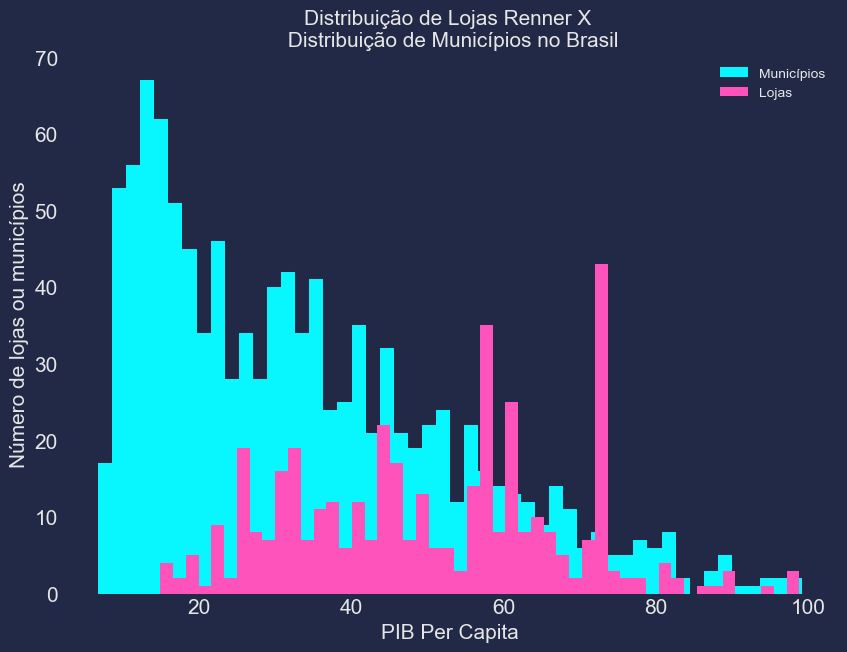

In [15]:
fig, ax = plt.subplots(figsize = (10, 7))

ax.hist(dados_municipios_histograma['pib_per_capta'], bins = 50)
ax.hist(dados_lojas_e_economicos_histograma['pib_per_capta'], bins = 50)
plt.xlabel('PIB Per Capita', fontsize = 15)
plt.ylabel('Número de lojas ou municípios', fontsize = 15)
ax.tick_params(axis='both', labelsize=15)
plt.title("Distribuição de Lojas Renner X \n Distribuição de Municípios no Brasil" , fontsize = 15)
ax.grid(False)
plt.legend(['Municípios', 'Lojas'])
plt.savefig('histograma.png')
plt.show()


# Dois padrões observados nos dados

* A maioria das lojas da Renner são em Shoppings.
* Cidades com menores PIB per capita não são alvos da empresa.

# Como projetar novas aberturas?

* Ao pegar dados de shoppings nós automaticamente já estamos aplicando o filtro econômico, pois cidades "pobres" não suportam um shopping center gigantesco.

# Passo 6 - Pegar dados de quantos shoppings centers grandes existem em cada cidade do país.

https://abrasce.com.br/guia-de-shoppings/

In [16]:
dados_shoppings = pd.read_csv('shoppings.csv')
dados_shoppings['City'] = dados_shoppings['City'].str.upper()
dados_shoppings['City'] = dados_shoppings['City'].str.strip()

In [ ]:
shoppings_por_cidade = dados_shoppings.groupby('City')['City'].size().sort_values()

shoppings_por_cidade

City
ALEXÂNIA           1
MARICÁ             1
MAUÁ               1
MINEIROS           1
MOGI MIRIM         1
                  ..
PORTO ALEGRE      16
GOIÂNIA           19
BRASÍLIA          22
RIO DE JANEIRO    40
SÃO PAULO         56
Name: City, Length: 244, dtype: int64

# Passo 7 - Calcular quantas lojas em Shopping a Renner tem aberta em cada cidade do Brasil

In [ ]:
dados_lojas_em_shoppings = dados_lojas_e_economia[dados_lojas_e_economia['Shopping Mall / Street'] == 'Shopping Mall']

dados_lojas_em_shoppings['City'] = dados_lojas_em_shoppings['City'].str.upper()

/var/folders/tl/s2fdr59561d6td79rgqdwmmr0000gn/T/ipykernel_38812/2702073468.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_lojas_em_shoppings['City'] = dados_lojas_em_shoppings['City'].str.upper()


In [ ]:
lojas_por_cidade = dados_lojas_em_shoppings.groupby('City')['City'].size().sort_values()

lojas_por_cidade

City
ANANINDEUA         1
NOVO HAMBURGO      1
OLINDA             1
OURINHOS           1
PALHOÇA            1
                  ..
PORTO ALEGRE      10
BELO HORIZONTE    10
BRASÍLIA          10
RIO DE JANEIRO    21
SÃO PAULO         35
Name: City, Length: 192, dtype: int64

# Passo 8 - Cruzar lojas atuais X Total de Shoppings

In [ ]:
shoppings_por_cidades = shoppings_por_cidade.to_frame()
lojas_por_cidade = lojas_por_cidade.to_frame()

shoppings_por_cidades.columns = ['Nº de shoppings']
lojas_por_cidade.columns = ['Nº de lojas']

In [ ]:
df_lojas_x_shoppings = lojas_por_cidade.join(shoppings_por_cidades, how = 'outer')

df_lojas_x_shoppings

,Nº de lojas,Nº de shoppings
City,,
ALEXÂNIA,NaN,1.0
ALTAMIRA,NaN,1.0
ANANINDEUA,1.0,1.0
ANDRADINA,NaN,1.0
ANGRA DOS REIS,1.0,1.0
...,...,...
VITÓRIA DA CONQUISTA,2.0,2.0
VOLTA REDONDA,2.0,2.0
VÁRZEA GRANDE,1.0,1.0


# Passo 9 - Calculando a abertura de lojas em Shoppings

In [22]:
df_lojas_x_shoppings = df_lojas_x_shoppings.fillna(0)

In [23]:
df_lojas_x_shoppings['Novas Aberturas'] = df_lojas_x_shoppings['Nº de shoppings'] - df_lojas_x_shoppings['Nº de lojas']

In [ ]:
df_lojas_x_shoppings.sort_values("Novas Aberturas")

In [24]:
df_lojas_x_shoppings = df_lojas_x_shoppings[df_lojas_x_shoppings['Novas Aberturas'] != -1]

df_lojas_x_shoppings

,Nº de lojas,Nº de shoppings,Novas Aberturas
City,,,
ALEXÂNIA,0.0,1.0,1.0
ALTAMIRA,0.0,1.0,1.0
ANANINDEUA,1.0,1.0,0.0
ANDRADINA,0.0,1.0,1.0
ANGRA DOS REIS,1.0,1.0,0.0
...,...,...,...
VITÓRIA DA CONQUISTA,2.0,2.0,0.0
VOLTA REDONDA,2.0,2.0,0.0
VÁRZEA GRANDE,1.0,1.0,0.0


In [25]:
df_lojas_x_shoppings['Novas Aberturas'].sum()

262.0

# Passo 10 - Calculando a abertura de lojas de rua

* A grande restrição são as lojas em shopping. Vou pegar as lojas totais finais e manter a proporção em relação ao que existe hoje.

In [ ]:
lojas_totais = dados_lojas_e_economia.groupby('Shopping Mall / Street')['Shopping Mall / Street'].size()

lojas_totais

Shopping Mall / Street
Shopping Mall    378
Street            54
Name: Shopping Mall / Street, dtype: int64

In [27]:
lojas_totais['Shopping Mall'] = lojas_totais['Shopping Mall']  + df_lojas_x_shoppings['Novas Aberturas'].sum()

In [28]:
lojas_totais

Shopping Mall / Street
Shopping Mall    640
Street            54
Name: Shopping Mall / Street, dtype: int64

In [29]:
lojas_rua_lojas_shop = 638/0.875878
lojas_rua_lojas_shop

728.411947782682

In [30]:
aberturas_rua = lojas_rua_lojas_shop - lojas_totais['Shopping Mall'] - lojas_totais['Street']
aberturas_rua

34.41194778268198

# Aberturas da Renner

* 262 Lojas em shoppings
* 34 lojas na rua
* 296 lojas no total!

# Passo 11 - Usar o modelo de Valuation da VAROS pra projetar a receita dos próximos anos + perpetuidade